### Inhaltsverzeichnis

* [1. Business Understanding](#chapter1)
    * [1.1. Projektbeschreibung](#section_1_1)
    * [1.2. train Dictionary](#section_1_2)
* [2. Data Understanding](#chapter2)
    * [2.1. Pakete importieren](#section_2_1)
    * [2.2. Daten einlesen](#section_2_2)
    * [2.3. Datensatz anzeigen](#section_2_3)
    * [2.4. Spaltennamen und Datentypen](#section_2_4)
    * [2.5. Datentypen anpassen](#section_2_5)
        * [2.5.1 Variable Age](#section_2_5_1)
        * [2.5.2 Variablen Driving_License, Previously_Insured und Vehicle_Damage](#section_2_5_2)
        * [2.5.3 Variable Gender](#section_2_5_3)
        * [2.5.4 Variable Region Code](#section_2_5_4)
        * [2.5.5 Variable Vehicle_Age](#section_2_5_5)
        * [2.5.6 Variable Policy_Sales_Channel](#section_2_5_6)
        * [2.5.7 Variable Vintage](#section_2_5_7)
        * [2.5.8 Variable Unnamed: 0](#section_2_5_8)
        * [2.5.9 Angepasste Datentypen anzeigen](#section_2_5_9)
    * [2.6. Deskriptive Analyse](#section_2_6)
        * [2.6.1 Kennzahlen zur Beschreibung des Datensatz](#section_2_6_1)
        * [2.6.2 Prüfung auf Missing Values](#section_2_6_2)
    * [2.7. Korrelation der Variablen](#section_2_7)
    * [2.8. Interpretation der Variablen](#section_2_8)
        * [2.8.1 Interpretation der Variable Gender](#section_2_8_1)
        * [2.8.2 Interpretation der Variable Age](#section_2_8_2)
        * [2.8.3 Interpretation der Variable Driving_License](#section_2_8_3)
        * [2.8.4 Interpretation der Variable Region_Code](#section_2_8_4)
        * [2.8.5 Interpretation der Variable Previously_Insured](#section_2_8_5)
        * [2.8.6 Interpretation der Variable Vehicle_Age](#section_2_8_6)
        * [2.8.7 Interpretation der Variable Vehicle_Damage](#section_2_8_7)
        * [2.8.8 Interpretation der Variable Annual_Premium](#section_2_8_8)
        * [2.8.9 Interpretation der Variable Policy_Sales_Channel](#section_2_8_9)
        * [2.8.10 Interpretation der Variable Vintage](#section_2_8_10)
        * [2.8.11 Interpretation der Variable Response](#section_2_8_11)
* [3. Data Preparation](#chapter3)
    * [3.1. Ausreißer behandeln](#section_3_1)
        * [3.1.1 Ausreißer innerhalb der Variable Age](#section_3_1_1)
        * [3.1.2 Ausreißer innerhalb der Variable Annual_Premium](#section_3_1_2)
    * [3.2. Analyse der nicht vorhandenen Werte](#section_3_2)
        * [3.2.1 Löschen der 51 fehlerhaften Datensätze](#section_3_2_1)
    * [3.3. Imputation der fehlenden Werte](#section_3_3)
        * [3.3.1 Variante 1: Ersetzung der fehlenden Werte durch den Mittelwert](#section_3_3_1)
            * [3.3.1.1 Imputation der Variable Age](#section_3_3_1_1)
            * [3.3.1.2 Imputation der Variable Annual Premium](#section_3_3_1_2)
        * [3.3.2 Variante 2: Ersetzung der fehlenden Werte durch den Median](#section_3_3_2)
            * [3.3.2.1 Imputation der Variable Age](#section_3_3_2_1)
            * [3.3.2.2 Imputation der Variable Annual Premium](#section_3_3_2_2)
        * [3.3.3 Variante 3: Ersetzung der fehlenden Werte durch Hot Code Imputation (LOCF)](#section_3_3_3)
            * [3.3.3.1 Imputation der Variable Age](#section_3_3_3_1)
            * [3.3.3.2 Imputation der Variable Annual Premium](#section_3_3_3_2)
        * [3.3.4 Variante 4: Ersetzung der fehlenden Werte kategorialer Variablen](#section_3_3_4)
            * [3.3.4.1 Imputation der Variable Gender](#section_3_3_3_1)
        * [3.3.5 Fazit](#section_3_3_5)
    * [3.4. Sampling](#section_3_4)
        * [3.4.1. Undersampling](#section_3_4_1)
        * [3.4.2. Oversampling](#section_3_4_2)
    * [3.5. Feature Engineering](#section_3_5)
        * [3.5.1. Altersklassen als Feature](#section_3_5_1)
        * [3.5.2. Features durch Aggregationen, Differenzen und Verhältnisse](#section_3_5_2)
        * [3.5.3. weitere Features](#section_3_5_5)
    * [3.6. Feature Selection](#section_3_6)
    * [3.7. Final Preprocessing](#section_3_7)
* [4. Modeling](#chapter4)
    * [4.1. Aufteilung in Test- und Trainingsdaten](#section_4_1)
    * [4.2. Modell: RandomForest](#section_4_2)
* [5. Evaluation](#chapter5)
* [6. Anwendung](#chapter6)
* [7. Deployment](#chapter7)

* [Model Explainer mit SHAP Values](#chapter8)

    * [Fazit zum Model Explainer mit SHAP Values](#section_8_1)
        

### 1. Business Understanding <a class="anchor" id="chapter1"></a>

#### 1.1 Projektbeschreibung <a class="anchor" id="section_1_1"></a>

Das Forschungsteam *ProInsurance* wird damit beauftragt, dass Projekt Cross-Selling-Prediction für den Kunden *NextGen Insurance* durchzuführen. 
Der Kunde benötigt Hilfe bei der Erstellung eines Modells, mit dem sich vorhersagen lässt, ob die Versicherungsnehmer des letzten Jahres auch an einer angebotenen Kfz-Versicherung interessiert sein werden.
Der Kunde wünscht die Durchführung des Projektes innerhalb eines knapp kalkulierten Zeitraums.

Zu diesem Zweck erhält das Forschungsteam von ihrem Auftraggeber einen Datenbestand bestehend aus > 300.000 Datensätzen. Zusätzlich ein Data Dictionary, welches eine kurze Beschreibung der Daten liefert.

Die *NextGen Insurance* hat mehrere Forschungsteams beauftragt an einer Lösung zu arbeiten, damit Sie sich nach Ende der Präsentationen für die beste Alternative entscheiden können.

#### 1.2 Data Dictionary <a class="anchor" id="section_1_2"></a>

Unser Auftraggeber die *NextGen Insurance* stellt uns folgendes Data Dictionary und damit verbunden folgende Beschreibungen der einzelnen Variablen zur Verfügung:

**1 - id : Unique ID for the customer<br>
2 - Gender : Gender of the customer<br>
3 - Age : Age of the customer <br>
4 - Driving_License : 0 : Customer doesn't have DL, 1 : Customer has DL<br>
5 - Region_Code : Unique code for the region of the customer<br>
6 - Previously_Insured : 0 : Customer doesn't have Vehicle Insurance, 1 : Customer has Vehicle Insurance<br> 
7 - Vehicle_Age : Age of the Vehicle<br>
8 - Vehicle_Damage : 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past<br>
9 - Annual_Premium : The amount customer needs to pay as premium in the year for Health insurance<br>
10 - Policy_Sales_Channel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
11 - Vintage : Number of Days customer has been associated with the company<br>
12 - Response : 1 : Customer is interested, 0 : Customer is not interested**

### 2. Data Understanding <a class="anchor" id="chapter2"></a>

#### 2.1 Pakete importieren <a class="anchor" id="section_2_1"></a>

In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import sklearn as sk
from sklearn.impute import KNNImputer

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
# SETUP
# OPTIONS: "simple_mean" | "simple_median" | "hot_code_locf"
age_imputer = "simple_mean"
# OPTIONS: "simple_mean" | "simple_median" | "hot_code_locf"
annual_premium_imputer = "simple_mean"


#### 2.2 Daten einlesen <a class="anchor" id="section_2_2"></a>

Der Datensatz wurde von der *NextGen Insurance* bereitgestellt.<br>
Der Datensatz wird zur Analyse eingelesen:
- Entfernung des Trennzeichen "$".
- Umwandlung von Zelleninhalten in Wahrheitswerte (Yes, yes, 1; No, no, 0).
- Einrücken des Datensatzes.

In [ ]:
train = pd.read_csv(
    "train.csv",
    sep="$",
    true_values=["Yes", "yes", "1"],
    false_values=["No", "no", "0"],
    index_col=False,
    low_memory=False,
)

test = pd.read_csv(
    "test.csv",
    sep="\$|,",  # this csv uses 2 different separators
    true_values=["Yes", "yes", "1"],
    false_values=["No", "no", "0"],
    index_col=False,
    header=None,
    engine="python"  # c engine does not support regex or multiple separators
)


#### 2.3 Datensatz Anzeigen <a class="anchor" id="section_2_3"></a>

Zur Betrachtung der Variablen aus dem Datensatz werden die ersten zwanzig Einträge angezeigt:

In [ ]:
train.head(20)


#### 2.4 Spaltennamen und Datentypen <a class="anchor" id="section_2_4"></a>

Um eventuelle Korrekturen vorzunehmen betrachten wir die Datentypen der im Datensatz enthaltenen Variablen.<br>
- Die Spalten **Driving_License**, **Previously_Insured**, und **Vehicle_Damage** wurden nicht in den booleschen Datentypen gecastet. Dies ist ein Indikator dafür das diese Spalten invalide oder fehlende Werte enthalten.
- Die Spalte **Age** wurde nicht in einen Integer oder Float gecastet, auch hier ist dies ein Indikator dafür, dass diese Spalte invalide oder fehlende Werte enthält. 

In [ ]:
train.info()


#### 2.5 Datentypen anpassen <a class="anchor" id="section_2_5"></a>

- Die zum Pandas Modul zugehörige Funktion ".unique()" ermöglicht die Ausgabe aller einzigartigen Werte. Dies erleichtert das Nachvollziehen von Eingabefehlern um diese zu korrigieren.
- Der Numpy-Datentyp `int64` unterstützt keine nullable Values (NaN), deshalb wird der Pandas-Datentyp `Int64` verwendet.

##### 2.5.1 Variable Age <a class="anchor" id="section_2_5_1"></a>

- Die letzten Werte beinhalten Eingabefehler. Bevor der Datentyp umgewandelt werden kann müssen die zwei Punkte (..) nach den Zahlen entfernt werden. 

In [ ]:
train["Age"].unique()


Aus dieser Ausgabe kann man sehen, dass einige fehlerhaften Eingaben getätigt wurden (z.B. "29.."). Da die Werte dieser Datensätze aber inhaltlich richtig sein könnten, sollen sie behalten werden. Durch das Casten in den String-Datentyp können die fehlerhaften Sonderzeichen entfertnt werden. Aschließend wird die Variable in den gewünschten Integer-Datentypen gecastet.

In [ ]:
# convert to string
train["Age"] = train["Age"].astype(pd.StringDtype())

# remove .. as this is what prevents us from propper type conversion
train["Age"] = train["Age"].str.replace(".", "")

# convert to int (no decimals observed in train data)
train["Age"] = train["Age"].astype("Int64")


##### 2.5.2 Variablen Driving_License, Previously_Insured und Vehicle_Damage <a class="anchor" id="section_2_5_2"></a>

- Die Spalten beinhalten fehlende Werte (NaN). Damit die fehlenden Werte ordnungsgemäß behandelt werden können, müssen die Spalten in den nullable Boolean Type gecastet werden.

In [ ]:
print("Driving_License:", train["Driving_License"].unique())
print("Previously_Insured:", train["Previously_Insured"].unique())
print("Vehicle_Damage:", train["Vehicle_Damage"].unique())


Die Ausgabe weist darauf hin, dass diese Variablen richtig einglesen werden konnten und es keine (inhaltlich) falschen Ausprägungen gibt. Es gibt nur `True`, `False` und fehlende Werte. 

In [ ]:
# convert each column
train["Driving_License"] = train["Driving_License"].astype(pd.BooleanDtype())
train["Previously_Insured"] = train["Previously_Insured"].astype(
    pd.BooleanDtype())
train["Vehicle_Damage"] = train["Vehicle_Damage"].astype(pd.BooleanDtype())


##### 2.5.3 Variable Gender <a class="anchor" id="section_2_5_3"></a>

In [ ]:
train["Gender"].unique()


In [ ]:
train["Gender"] = train["Gender"].astype(pd.CategoricalDtype())


##### 2.5.4 Variable Region Code <a class="anchor" id="section_2_5_4"></a>

- Der letzte Werte beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 41.0 die zwei Rautezeichen (##) entfernt werden.

In [ ]:
train["Region_Code"].unique()


In [ ]:
# convert to string
train["Region_Code"] = train["Region_Code"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
train["Region_Code"] = train["Region_Code"].str.replace("#", "")

# convert to category as the region codes are similar to postal codes and have no order
train["Region_Code"] = train["Region_Code"].astype(pd.CategoricalDtype())


##### 2.5.5 Variable Vehicle_Age <a class="anchor" id="section_2_5_5"></a>

In [ ]:
train["Vehicle_Age"].unique()


In [ ]:
# no cleanup required
train["Vehicle_Age"] = train["Vehicle_Age"].astype(pd.CategoricalDtype())


##### 2.5.6 Variable Policy_Sales_Channel <a class="anchor" id="section_2_5_6"></a>

- Ein Wert beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 26.0 die zwei Rautezeichen (##) entfernt werden.

In [ ]:
train["Policy_Sales_Channel"].unique()


In [ ]:
# remove ## as this is what prevents us from propper type conversion
train["Policy_Sales_Channel"] = train["Policy_Sales_Channel"].str.replace(
    "#", "")

train["Policy_Sales_Channel"] = train["Policy_Sales_Channel"].astype(
    pd.CategoricalDtype()
)


##### 2.5.7 Variable Vintage <a class="anchor" id="section_2_5_7"></a>

- Ein Wert beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 81 die zwei Rautezeichen (##) entfernt werden.
- Der Numpy-Datentyp `int64` unterstützt keine nullable Values (NaN), deshalb wird der Pandas-Datentyp `Int64` verwendet.

In [ ]:
train["Vintage"].unique()


In [ ]:
# convert to string
train["Vintage"] = train["Vintage"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
train["Vintage"] = train["Vintage"].str.replace("#", "")

# convert to category as the region codes are similar to postal codes and have no order
train["Vintage"] = train["Vintage"].astype("Int64")


##### 2.5.8 Variable Unnamed: 0 <a class="anchor" id="section_2_5_8"></a>

- Die Spalte Unnamed: 0 hat keine Information und wird entfernt.

In [ ]:
train.drop("Unnamed: 0", axis="columns", inplace=True)


##### 2.5.9 Angepasste Datentypen anzeigen <a class="anchor" id="section_2_5_9"></a>

In [ ]:
train.info()


#### 2.6 Deskriptive Analyse <a class="anchor" id="section_2_6"></a>

##### 2.6.1 Kennzahlen zur Beschreibung des Datensatz <a class="anchor" id="section_2_6_1"></a>

Folgende statistische Kennzahlen werden verwenden:

In [ ]:
train.describe(include="all").transpose()


Auffälligkeiten einzelner Variablen anhand der statistischen Kennzahlen werden im nachfolgenden näher erläutert:

| **Variable**          | **Beschreibung**  | 
|          :-           |         :-        |
| ID                    |- Beginnt bei 1 und endet bei 380.999 <br> - weißt keine Auffälligkeiten auf| 
| Gender                |- Das Geschlecht "Male" kommt am häufigsten vor mit 205.447 Datensätzen <br> - 2 verschiedene Ausprägungen <br> - 1051 Datensätze fehlen (Vergleich von 379.948 zu 380.999 Datensätzen) | 
| Age                   |- min. = 20 Jahre alt nicht auffällig <br> - Im Durchschnitt 39 Jahre alt <br> - max. = 205 Jahre alt <br> - 10.892 Datensätze fehlen (Vergleich von 370.107 zu 380.999 Datensätzen) | 
| Driving_License       |- Mehr Personen haben keinen Führerschein mit 206.635 Datensätzen als das Sie einen Führerschein haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Region_Code           |- Die PLZ 28.0 kommt am häufigsten vor mit 106.372 Datensätzen <br> - 53 verschiedene Ausprägungen | 
| Previously_Insured    |- Mehr Personen haben keine Versicherung mit 206.635 Datensätzen als das Sie eine Versicherung haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Vehicle_Age           |- Das Alter des Fahrzeugs beläuft sich auf bei den meisten Personen auf 1-2 Jahre mit 380.948 Datensätzen <br> - 3 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Vehicle_Damage        |- Bei mehr Personen, 192.328 Datensätze, ist es zu einem Schadensfall gekommen <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Annual_Premium        |- min. = -9997.0€ auffällig, da der Betrag den die Kunden zahlen müssen nicht negativ sein kann. <br> - Im Durchschnitt 30.527.71€ <br> - max. = 540.165€ auffällig, da der Betrag deutlich zu hoch ist | 
| Policy_Sales_Channel  |- 155 verschiedene Ausprägungen | 
| Vintage               |- min. = 10 Tage <br> - Im Durchschnitt 154 Tage <br> - max. = 299 Tage <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Response              |- Mehr Personen sind nicht interessiert mit 334.297	Datensätzen <br> - 2 verschiedene Ausprägungen | 


##### 2.6.2 Prüfung auf Missing Values <a class="anchor" id="section_2_6_2"></a>

Die zum Pandas Modul zugehörige Funktion ".isna()" ermöglicht die Ausgabe aller Missing Values (NA Values).

In [ ]:
train.isna().sum()


Die Überprüfung auf missing Values zeigt, dass vor allem für die Variable `Age` Werte imputiert werden sollten. In der Spalte `Gender` fehlen rund 1000 Werte. Weiter sieht man, dass in den Spalten `Driving_License`, `Previously_Insured`, `Vehicle_Age`, `Vehicle_Damage` und `Vintage` genau 51 Werte fehlen. Das deutet darauf hin, dass diese missing Values zu den selben Datensätzen gehören, was nachfolgend überprüft wird.

In [ ]:
# look for the 51
# len(train.loc[train["Vintage"].isna()]) # => 51 entities
# len(train.loc[train["Vintage"].isna() & train["Vehicle_Damage"].isna()]) # => 51 entities
# len(train.loc[train["Vintage"].isna() & train["Vehicle_Damage"].isna() & train["Vehicle_Age"].isna()]) # => 51 entities
# len(train.loc[train["Vintage"].isna() & train["Vehicle_Damage"].isna() & train["Vehicle_Age"].isna() & train["Previously_Insured"].isna()]) # => 51 entities
# len(train.loc[train["Vintage"].isna() & train["Vehicle_Damage"].isna() & train["Vehicle_Age"].isna() & train["Previously_Insured"].isna() & train["Driving_License"].isna()]) # => 51 entities
bad_train = train.loc[
    train["Vintage"].isna()
    & train["Vehicle_Damage"].isna()
    & train["Vehicle_Age"].isna()
    & train["Previously_Insured"].isna()
    & train["Driving_License"].isna()
]
print(
    f"Data sets with Vintage, Vehicle_Damage, Vehicle_Age, Previously_Insured and Driving_License missing: {len(bad_train)}")
# bad_train.groupby("Region_Code").count().sort_values("id", ascending=False)
# bad_train.groupby("Policy_Sales_Channel").count().sort_values("id", ascending=False)
# => !!! There are 51 entities that make up most of the missing values.
# maybe we simply remove them


Mithilfe einer Und-Verbindung wird geprüft, ob die missing Values alle von den selben Datensätzen stammen.
Die Annahme wurde bestätigt. Der Test ergab 51 Treffer.
Da nur wenige Informationen zu diesen Datensätzen verfügbar sind und eine Imputation daher nur eingeschränkt möglich ist, werden die Datensätze im Verlauf der Data Preparation entfernt. Hierdurch wird die Modellgüte nicht ausschlaggebend beeinträchtigt, da 51 Datensätze in der Gesamtheit der Daten (ca. 390.000 Datensätze) keinen signifikanten Einfluss haben.

Nachfolgend wurde überprüft, woher diese fehlerhaften Datensätze kommen. Unter verdacht standen die Vertriebskanäle `Policy_Sales_Channel` und `Region_Code` was auf fehlerhafte Eingaben in einer speziellen Filiale zurückzuführen wäre.

In [ ]:
# cast Region_Code to Category using only the options that appear in the data frame
bad_train["Region_Code"] = bad_train["Region_Code"].astype(
    pd.CategoricalDtype(bad_train["Region_Code"].unique())
)

sns.catplot(
    data=bad_train, x="Region_Code", kind="count", height=10, aspect=2 / 1
)


In [ ]:
bad_train_grpd = bad_train.groupby("Policy_Sales_Channel").count()

bad_train_grpd = bad_train_grpd.loc[bad_train_grpd["id"] > 0]

# reset index to re-include groupby counts (this resets all dtypes)
bad_train_grpd = bad_train_grpd.reset_index()

# reset PSC to categorial dtype
bad_train_grpd["Policy_Sales_Channel"] = bad_train_grpd["Policy_Sales_Channel"].astype(
    pd.CategoricalDtype(bad_train_grpd["Policy_Sales_Channel"].unique())
)

sns.catplot(
    data=bad_train_grpd,
    x="Policy_Sales_Channel",
    y="id",
    height=10,
    aspect=2 / 1,
    kind="bar",
)


Es gibt zwar Hinweise darauf, dass manche Regionen und Sales Channel fehleranfälliger sind als andere, der Verdacht, dass die fehlerhaften Datensätze auf eine Datenquelle zurückzuführen sind, konnte nicht bestätigt werden.

#### 2.7 Korrelation der Variablen <a class="anchor" id="section_2_7"></a>

In [ ]:
# remove id from correlation matrix as it does not provide any usefull information
def correlation_matrix(train):
    for column in train:
        if column == "id":
            selected_columns = train.drop("id", axis="columns")
            correlation = selected_columns.corr()
            return correlation


correlation_matrix(train)


In [ ]:
def correlation_matrix(train):
    for columns in train:
        if columns == "id":
            selected_columns = train.drop("id", axis="columns")
            correlation = selected_columns.corr()
            plt.figure(figsize=(12, 6))
            sns.heatmap(
                correlation, annot=True, cmap="flare", linewidths=1, linecolor="black"
            )
            plt.title("Korrelationsmatrix", fontsize=18, weight="bold")


correlation_matrix(train)


- Es fällt auf, dass `Previously_Insured` und `Driving_License` die höchste Korrelation, undzwar von 1, aufweisen. Das liegt daran, dass jeder KFZ-Besitzer eine KFZ-Versicherung haben muss sofern das KFZ angemeldet ist.
- Die geringste Korrelation weisen die Variablen (`Driving_License` und `Vintage`), sowie (`Previously_Insured` und `Vintage`) auf, mit einer Korrelation von 0,0024.
- Hohe negative Korrelation zwischen `Vehicle_Damage` und `Previously_Insured`
- Korrelation von 0,35 zwischen `Vehicle_Damage` und `Response`. Wenn ich in der Vergangenheit einen Schadensfall hatte, bin ich eher dazu geneigt eine Versicherung abzuschließen.
- Alle anderen Variablen sind zudem nahezu unkorreliert.

In [ ]:
print(f'In wie vielen Fällen ist Driving_License != Previously_Insured?\n -> {len(train.loc[train["Driving_License"] != train["Previously_Insured"]])}')
# Observation was confirmed!
# Columns Driving_License and Previously_Insured are equals!


Beobachtung:
- Die Spalte `Driving_License` und `Previously_Insured` haben exakt die gleichen Daten

#### 2.8 Interpretation der Variablen <a class="anchor" id="section_2_8"></a>

##### 2.8.1 Interpretation der Variable Gender <a class="anchor" id="section_2_8_1"></a>

Die Variable Gender beschreibt das Geschlecht der Versicherungsnehmer.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
colors = sns.color_palette('pastel')[0:2]
l = ["True", "False"]

male = train.loc[train["Gender"] == "Male"]

# MALE PIE CHART
d_m = [len(male.loc[male["Response"] == True]),
       len(male.loc[male["Response"] == False])]
ax1.pie(d_m, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Male Responses")

# FEMALE PIE CHART
female = train.loc[train["Gender"] == "Female"]
d_f = [len(female.loc[female["Response"] == True]),
       len(female.loc[female["Response"] == False])]
ax2.pie(d_f, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Female Responses")

Beobachtungen:
- Keine signifikanten unterschiede im Interesse an KFZ-Versicherungen bei Männern und Frauen

##### 2.8.2 Interpretation der Variable Age <a class="anchor" id="section_2_8_2"></a>

Die Variable Age beschreibt das Alter der Versicherungsnehmer.

Erwartungen:
- Plotten der Altersverteilung gibt Rückschlüsse zur Datenqualität bzw. zur Datenherkunft
    - Es ist eine pyramiedenförmige Altersverteilung zu erwarten, da der Datensatz aus Indien stammt
- Ältere und damit erfahrenere Kunden sind eher an einer Versicherung interessiert

In [ ]:
sns.set(rc={"figure.figsize": (25, 10)})
histplot_age = sns.histplot(train, x="Age", binwidth=5)
histplot_age.set_title("Betrachtung aller Daten", fontsize=30, weight='bold')


Beobachtungen:
- Es gibt unrealisitsch hohe Alterswerte
- Aus der Fallbeschreibung konnte entnommen werden, dass es sich um einen Datensatz aus Indien handelt. Es wurde von der Währung Rs (Indische Rupie) gesprochen. Die Altersverteilung kommt der pyramidenförmigen demografischen Verteilung von Indien deutlich näher als der Urnenform von Deutschland. Die geplottete Altersverteilung bestätigt zusätzlich die Datenherkunft und Datengüte, da die erwartete Verteilung, bis auf einen Sattelpunkt bei 30-40, ausgegeben wurde.
- Es gibt keine Werte unter 20

In [ ]:
sns.set(rc={"figure.figsize": (25, 10)})
boxplot = sns.boxplot(data=train, y="Gender", x="Age", orient="horizontal")
boxplot.set_xlabel("Age", fontsize=20, weight='bold')
boxplot.set_ylabel("Gender", fontsize=20, weight='bold')
boxplot.set_title("Boxplot der Variable Age in Zusammenhang mit Gender." +
                  "\n", fontsize=30, weight='bold')
plt.tick_params(axis="both", labelsize=18)


In [ ]:
print(f'Durchschnittsalter von Männern: {train.loc[train["Gender"] == "Male"].mean()["Age"]}')
print(f'Durchschnittsalter von Frauen: {train.loc[train["Gender"] == "Female"].mean()["Age"]}')

Beobachtungen:
- Männer sind im Schnitt älter als Frauen

Alle Datensätze bei denen das Alter über 100 Jahren liegt, sind nicht realitätsnah und werden genauer betrachtet:

In [ ]:
train.loc[(train.Age >= 100)]


Die Daten mit unrealistisch hohen Alterswerten sind möglicherweise alte Datensätze, die nicht gepflegt bzw. im Fall der Vertragsauflösung nicht gelöscht wurden.

##### 2.8.3 Interpretation der Variable Driving_License <a class="anchor" id="section_2_8_3"></a>


Die Variable `Driving_License` beschreibt ob ein Versicherungsnehmer einen Führerschein besitzt.

Erwartungen:
- Kunden, die keinen Führerschein besitzen, haben keine Verwendung für eine KFZ-Versicherung
    - Außer sie planen kurzfristig den Erwerb eines Führerscheins
- Führerscheinbesitzer haben möglicherweise schon eine KFZ-Versicherung

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
colors = sns.color_palette('pastel')[0:4]

dl_true = train.loc[train["Driving_License"] == True]
dl_false=train.loc[train["Driving_License"] == False]

# dl_true PIE CHART
d_true = [len(dl_true.loc[dl_true["Response"] == True]),
       len(dl_true.loc[dl_true["Response"] == False])]
l_true = ["Response: True", "Response: False"]
ax1.pie(d_true, labels=l_true, colors=colors, autopct='%.0f%%')
ax1.set_title("Driving License Owner")

# dl_false PIE CHART
d_false = [len(dl_false.loc[dl_false["Response"] == True]),
       len(dl_false.loc[dl_false["Response"] == False])]
l_false = l_true

ax2.pie(d_false, labels=l_false, colors=colors, autopct='%.0f%%')
ax2.set_title("Not Driving License Owner")


Beobachtungen:
- Nahezu kein Führerscheinbesitzer ist an einer KFZ-Versicherung interessiert. Möglicherweise weil Führerscheinbesitzer auch ein Auto und deswegen auch eine KFZ-Versicherung besitzen
- Fast 1/4 aller Führerscheinlosen haben Interesse an einer KFZ-Versicherung bekundet

##### 2.8.4 Interpretation der Variable Region_Code <a class="anchor" id="section_2_8_4"></a>


Die Variable `Region_Code` beschreibt den Wohnort der Kunden. Es handelt sich um eine kategoriale Variable mit 53 Ausprägungen. Sie kann analog zur Postleitzahl verstanden werden.

Erwartungen:
- In einer guten Wohngegend können sich die Versicherungsnehmer eher eine KFZ-Versicherung leisten oder besitzen ein teureres Auto, für das sich eine Versicherung lohnt
- Analog dazu verzichten Kunden aus ärmeren Regionen aus finanziellen Gründen eher auf eine KFZ-Versicherung
- Bestimmte Verkaufskanäle konzentrieren sich auf bestimmte Regionen, andere agieren flächendeckend

In [ ]:
len(train["Region_Code"].unique())

In [ ]:
p_data = train.groupby("Region_Code").count()

p_data = p_data.loc[p_data["id"] > 0]

# reset index to re-include groupby counts (this resets all dtypes)
p_data = p_data.reset_index()

# reset PSC to categorial dtype
p_data["Region_Code"] = p_data["Region_Code"].astype(
    pd.CategoricalDtype(p_data["Region_Code"].unique())
)

plot = sns.catplot(
    data=p_data,
    x="Region_Code",
    y="id",
    height=10,
    aspect=2 / 1,
    kind="bar"
)


In [ ]:

plot = sns.catplot(
    data=train,
    x="Region_Code",
    y="Annual_Premium",
    height=10,
    aspect=2 / 1,
)

##### 2.8.5 Interpretation der Variable Previously_Insured <a class="anchor" id="section_2_8_5"></a>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
colors = sns.color_palette('pastel')[0:2]

d_1 = train.loc[train["Previously_Insured"] == True]
d_2 = train.loc[train["Previously_Insured"] == False]

l = ["Response: True", "Response: False"]

p_1 = [len(d_1.loc[d_1["Response"] == True]),
       len(d_1.loc[d_1["Response"] == False])]
ax1.pie(p_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Previously insured")

p_2 = [len(d_2.loc[d_2["Response"] == True]),
       len(d_2.loc[d_2["Response"] == False])]
ax2.pie(p_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Not previously insured")


##### 2.8.6 Interpretation der Variable Vehicle_Age <a class="anchor" id="section_2_8_6"></a>

Die Variable `Vehicle_Age` beschreibt das Alter des Fahrzeugs. Es ist eine kategoriale Variable mit den drei Ausprägungen `< 1 Year`, `1-2 Year` und `> 2 Years`.

Erwartungen:
- Besitzer neuer KFZs wollen ihre Neuanschaffung eher versichern

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
colors = sns.color_palette('pastel')[0:2]

dl_1 = train.loc[train["Vehicle_Age"] == "< 1 Year"]
dl_2 = train.loc[train["Vehicle_Age"] == "1-2 Year"]
dl_3 = train.loc[train["Vehicle_Age"] == "> 2 Years"]

l = ["Response: True", "Response: False"]
# dl_1 PIE CHART
d_1 = [len(dl_1.loc[dl_1["Response"] == True]),
       len(dl_1.loc[dl_1["Response"] == False])]
ax1.pie(d_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Vehicle_Age < 1 Year")

# dl_2 PIE CHART
d_2 = [len(dl_2.loc[dl_2["Response"] == True]),
       len(dl_2.loc[dl_2["Response"] == False])]
ax2.pie(d_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Vehicle_Age 1-2 Year")

# dl_3 PIE CHART
d_3 = [len(dl_3.loc[dl_3["Response"] == True]),
       len(dl_3.loc[dl_3["Response"] == False])]
ax3.pie(d_3, labels=l, colors=colors, autopct='%.0f%%')
ax3.set_title("Vehicle_Age > 2 Years")


Beobachtungen:
- Das Gegenteil der Erwarteten Verteilung ist der Fall: Je älter ein Auto ist, desto eher ist der Besitzer an einer Versicherung interessiert

##### 2.8.7 Interpretation der Variable Vehicle_Damage <a class="anchor" id="section_2_8_7"></a>

Die Variable `Vehicle_Damage` beschreibt, ob es an einem Fahrzeug schonmal einen Schadensfall gab.

Erwartung:
- Jemand, der bereits einen Schaden hatte, hat aus der Erfahrung gelernt, dass es Vorteilhaft sein kann eine Versicherung zu haben

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
colors = sns.color_palette('pastel')[0:2]

dl_1 = train.loc[train["Vehicle_Damage"] ==True]
dl_2 = train.loc[train["Vehicle_Damage"] == False]

l = ["Response: True", "Response: False"]
# dl_1 PIE CHART
d_1 = [len(dl_1.loc[dl_1["Response"] == True]),
       len(dl_1.loc[dl_1["Response"] == False])]
ax1.pie(d_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Vehicle_Damage: True")

# dl_2 PIE CHART
d_2 = [len(dl_2.loc[dl_2["Response"] == True]),
       len(dl_2.loc[dl_2["Response"] == False])]
ax2.pie(d_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Vehicle_Damage: False")


Beobachtung:
- Genau wie erwartet, gibt es einen deutlichen Zusammenhang zwischen bereits erlittenem Schadensfall und dem Interesse an einer KFZ-Versicherung

##### 2.8.8 Interpretation der Variable Annual_Premium <a class="anchor" id="section_2_8_8"></a>

Die Variable `Annual_Premium` beschreibt den jährlichen Versicherungsbeitrag (der Krankenversicherung) des Kunden.

Erwartungen:
- Ein Kunde, der mit seiner Krankenversicherung zufrieden ist, etwa weil der Beitrag niedrig ist, ist eher verleitet, bei der selben Versicherung ein weiteres Produkt zu kaufen
- Das `Annual_Premium` ist abhängig vom Alter des Versicherten.

In [ ]:
train["Annual_Premium"].describe()


In [ ]:
# len(train.loc[train["Annual_Premium"].isna()])
train["Annual_Premium"].isna().sum()


- Der durchschnittliche `Annual_Premium` liegt bei rund 30.500
- Das Minimun ist negativ, was auf (mindestens) einen fehlerhaften Wert hindeutet
- Es gibt 100 missing Values
- Das Maximum liegt gbei ca. 540.000 (dem 17 fachen des Durchschnitts). Entweder handelt es sich um ein teures Luxusauto, oder um einen Fehler

In [ ]:
sns.set(rc={"figure.figsize": (20, 10)})

histplot_annual_premium = sns.histplot(
    train, x="Annual_Premium", binwidth=2500)
histplot_annual_premium.set_title(
    "Übersicht über alle Werte", fontsize=30, weight='bold')


Beobachtungen:
- Es gibt zwei Arten von Ausreißern. es gibt eine deutliche Konzentration (~65.000) bei einem Wert, außerhalb der eigentlichen Verteilung
- Es gibt wenige besonders hohe Werte (>100.000)
- Die Skala für `Annual_Premium` beginnt nicht bei 0, also gibt es invalide negative Werte

In [ ]:
# count values < 3.000
print(
    f"Anzahl konzentrierter Werte bei rund 2.500: {len(train.loc[(train['Annual_Premium'] > 0) & (train['Annual_Premium'] < 3000)])}")

# count values > 100.000 -> 773
print(
    f"Anzahl besonders hoher Werte für Annual_Premium: {len(train.loc[train['Annual_Premium'] > 100000])}")


Theorie: Das `Annual_Premium` ist abhängig vom Alter des Versicherten.

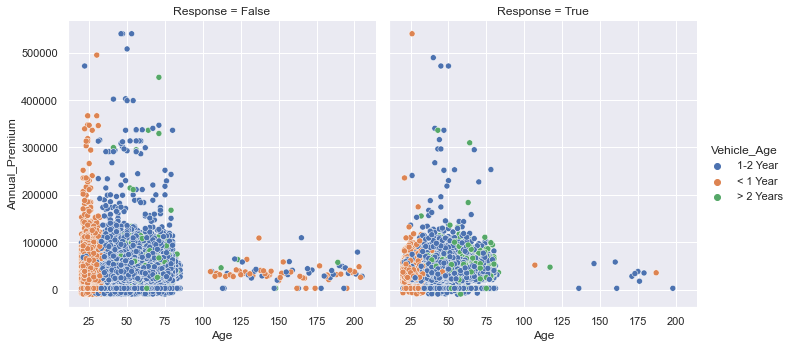

In [46]:
sns.set(rc={"figure.figsize": (20, 10)})
x = sns.relplot(data=train, x="Age", y="Annual_Premium",
                col="Response", hue="Vehicle_Age")


Beobachtung:
- Die Theorie, dass ältere Versicherungsnehmer höhere Beiträge zahlen scheint nicht zu stimmen. Es hätte ein Abwärtstrend zu sehen sein müssen.
- Vor allem in der Gruppe der unter einem Jahr alten Autos kann man sehen, dass die Besitzer fast ausschließlich Versicherungen abgeschlossen haben, wenn sie bereits einen günstigen KV-Tarif hatten.

Text(0.5, 1.0, 'Betrachtung des validen/realistischen Datenbereichs')

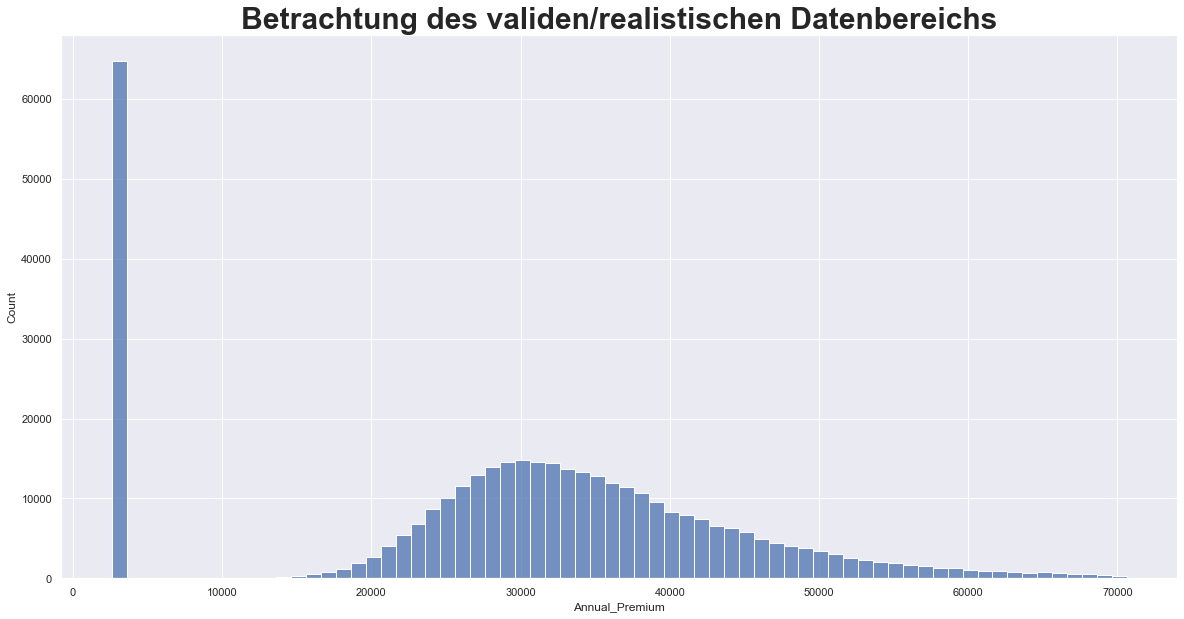

In [47]:
sns.set(rc={"figure.figsize": (20, 10)})

plot_data = train.loc[(train["Annual_Premium"] > 0) &
                      (train["Annual_Premium"] < 70000)]

histplot_annual_premium = sns.histplot(
    plot_data, x="Annual_Premium", binwidth=1000)
histplot_annual_premium.set_title(
    "Betrachtung des validen/realistischen Datenbereichs", fontsize=30, weight='bold')


Beobachtungen:
- rechtsschiefe Verteilung um 30.000
- Ausreißer bei rund 2.000. Das ist möglicherweise ein besonderer Versicherungstarif, z.B. ein pauschaler Tarif.

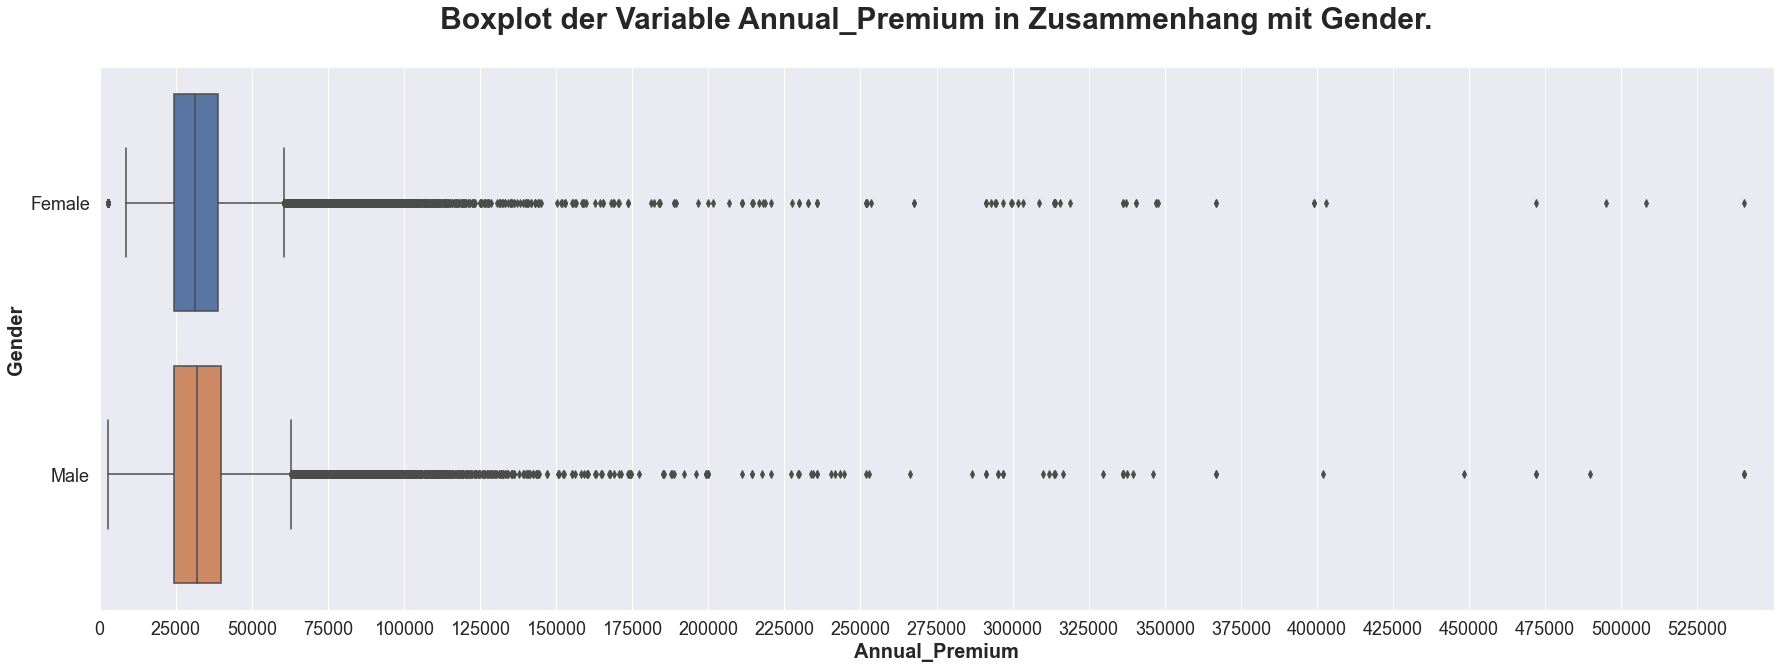

In [48]:
sns.set(rc={"figure.figsize": (30, 10)})
boxplot = sns.boxplot(data=train, y="Gender",
                      x="Annual_Premium", orient="horizontal")
boxplot.set_xlabel("Annual_Premium", fontsize=20, weight='bold')
boxplot.set_ylabel("Gender", fontsize=20, weight='bold')

boxplot.set_xlim(0, 550000)
boxplot.set_xticks(range(0, 550000, 25000))

boxplot.set_title("Boxplot der Variable Annual_Premium in Zusammenhang mit Gender." +
                  "\n", fontsize=30, weight='bold')
plt.tick_params(axis="both", labelsize=18)


##### 2.8.9 Interpretation der Variable Policy_Sales_Channel <a class="anchor" id="section_2_8_9"></a>

Die Variable `Policy_Sales_Channel` beschreibt den Verkaufskanal, über den die bestehende Krankenversicherung abgeschlossen wurde.

Erwartungen:
- Bei bestimmten Verkaufskanälen gibt es ein höheres Interesse an KFZ-Versicherungen


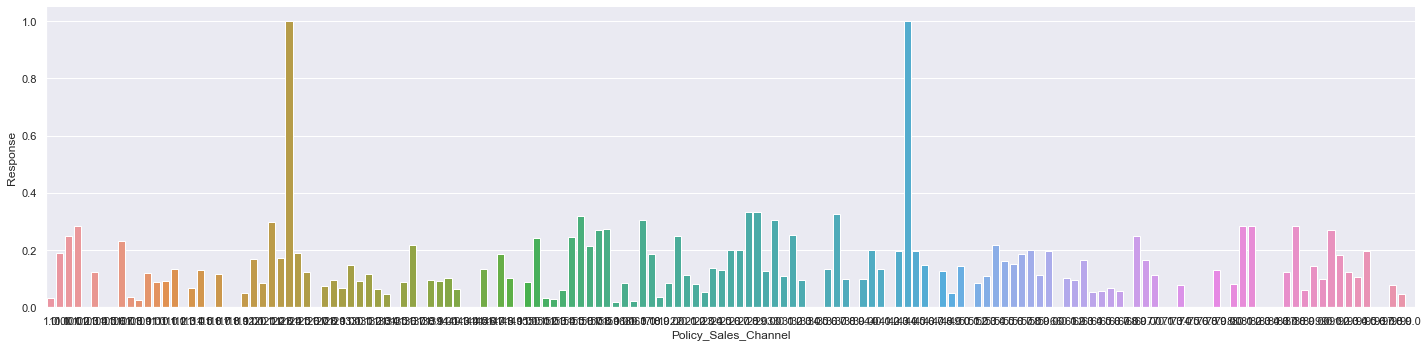

In [49]:
p = sns.catplot(x="Policy_Sales_Channel",y="Response", data=train, ci=None, aspect=4, kind="bar")

Beobachtungen:
- Es gibt deutliche Unterschiede zwischen den Vertriebskanälen
    - Allerdings haben Vertriebskanäle mit wenigen Kunden extremere Werte, da die Stichprobengröße kleiner ist

Es müssen weitere Untersuchungen von prozentualer positiver Rückmeldung und Anzahl der Kunden für jeden Vertriebskanal vorgenommen werden.

Nachfolgend werden die Daten pro Vertriebskanal zusammengefasst, um deren Positivrückmeldungsrate im Vergleich zur Anzahl der betreuten Kunden einordnen zu können.

Text(0.5, 1.0, 'Erfolgsquote und Anzahl der Kunden pro Vertriebskanal (1 Punkt je Kanal)')

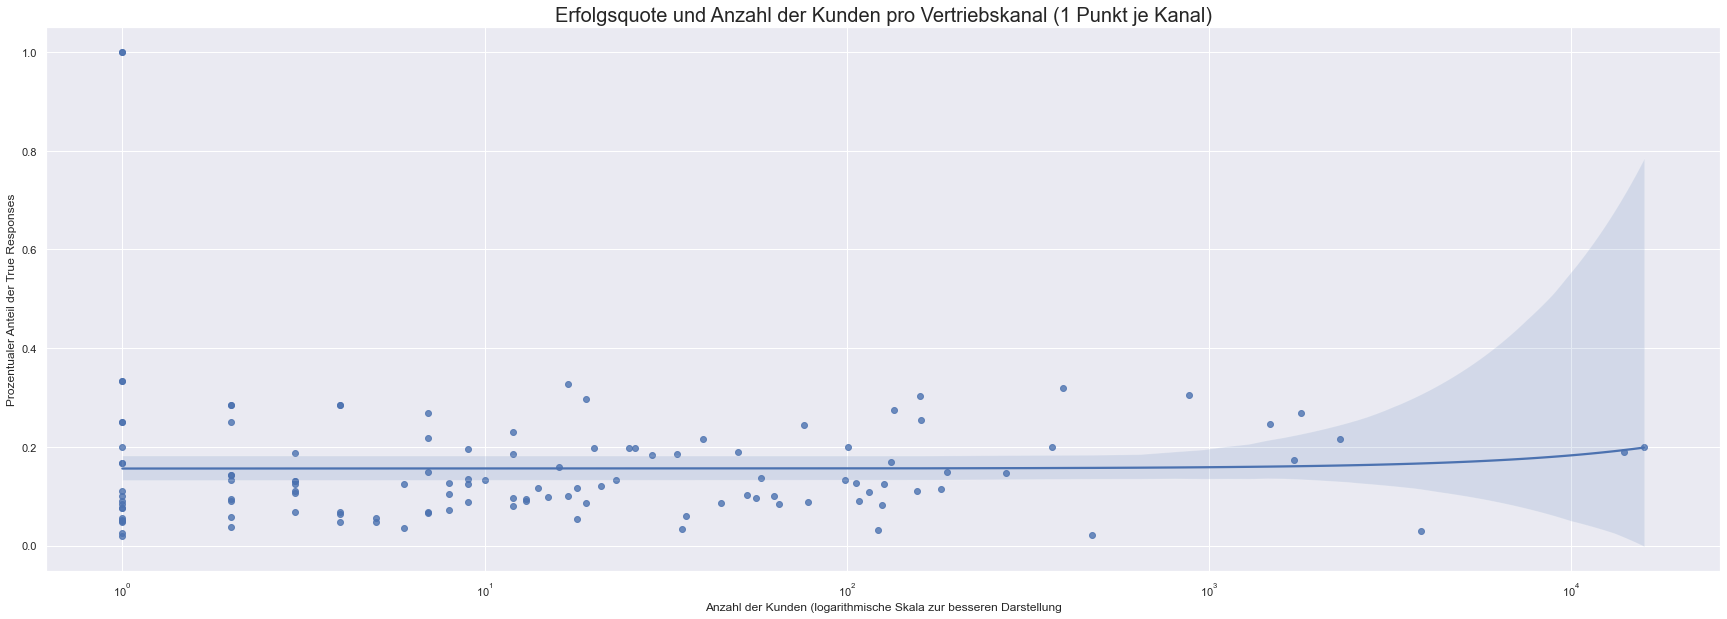

In [50]:
# get percentage of True response
percent =  train.groupby("Policy_Sales_Channel").sum() / train.groupby("Policy_Sales_Channel").count()
percent = percent.reset_index()
percent["Policy_Sales_Channel"] = percent["Policy_Sales_Channel"].astype(pd.CategoricalDtype(percent["Policy_Sales_Channel"].unique()))

# get count of all response
count = train.groupby("Policy_Sales_Channel").sum()
count = count.reset_index()
count["Policy_Sales_Channel"] = count["Policy_Sales_Channel"].astype(pd.CategoricalDtype(count["Policy_Sales_Channel"].unique()))

# join results
combined = pd.merge(percent, count, how="inner", on=["Policy_Sales_Channel","Policy_Sales_Channel"], suffixes=["_percent", "_count"])
combined = combined.sort_values("Response_percent", ascending=False)

# trim useless columns
combined = combined[["Policy_Sales_Channel", "Response_percent", "Response_count"]]

no_customers = combined.loc[combined["Response_count"] == 0]
combined
# remove sales channels with no customers
combined = combined.loc[combined["Response_count"] > 0]
combined
p = sns.regplot(x="Response_count", y="Response_percent" ,data=combined)
p.set_xscale("log")
p.set_xlabel("Anzahl der Kunden (logarithmische Skala zur besseren Darstellung")
p.set_ylabel("Prozentualer Anteil der True Responses")
p.set_title("Erfolgsquote und Anzahl der Kunden pro Vertriebskanal (1 Punkt je Kanal)", size=20)


In [51]:
combined


,Policy_Sales_Channel,Response_percent,Response_count
97,43.0,1.000000,1
27,123.0,1.000000,1
80,28.0,0.333333,1
79,27.0,0.333333,1
89,36.0,0.326923,17
...,...,...,...
56,151.0,0.031411,122
57,152.0,0.028624,3857
10,108.0,0.026316,1
66,160.0,0.021815,475


In [52]:
print(f"Anzahl der Vertriebskanäle ohne Kunden: {len(no_customers)}")

Anzahl der Vertriebskanäle ohne Kunden: 34


Beobachtungen:
- Die Vertriebskanäle sind unabhängig von ihrer Größe mehr oder weniger erfolgreich
- Es gibt große Abweichungen vom Mittelwert unabhängig von der Anzahl der Kunden
- Wie erwartet haben die Vertriebskanäle mit 100% Positivrückmeldungsquote nur einen einzigen Kunden
    - Dennoch gibt es auch Vertriebskanäle mit über 100 Kunden und rund 33% Positivquote
- Die meisten Vertriebskanäle haben weniger als 100 Kunden
- Es gibt 34 Vertriebskanäle ohne Kunden

##### 2.8.10 Interpretation der Variable Vintage <a class="anchor" id="section_2_8_10"></a>

Die Variable `Vintage` beschreibt die Dauer des Versicherungsverhältnisses im letzten Jahr.

Erwartung:
- Besondere Salesevents oder Aktionen mit limitierter Laufzeit können als Peak erkannt werden

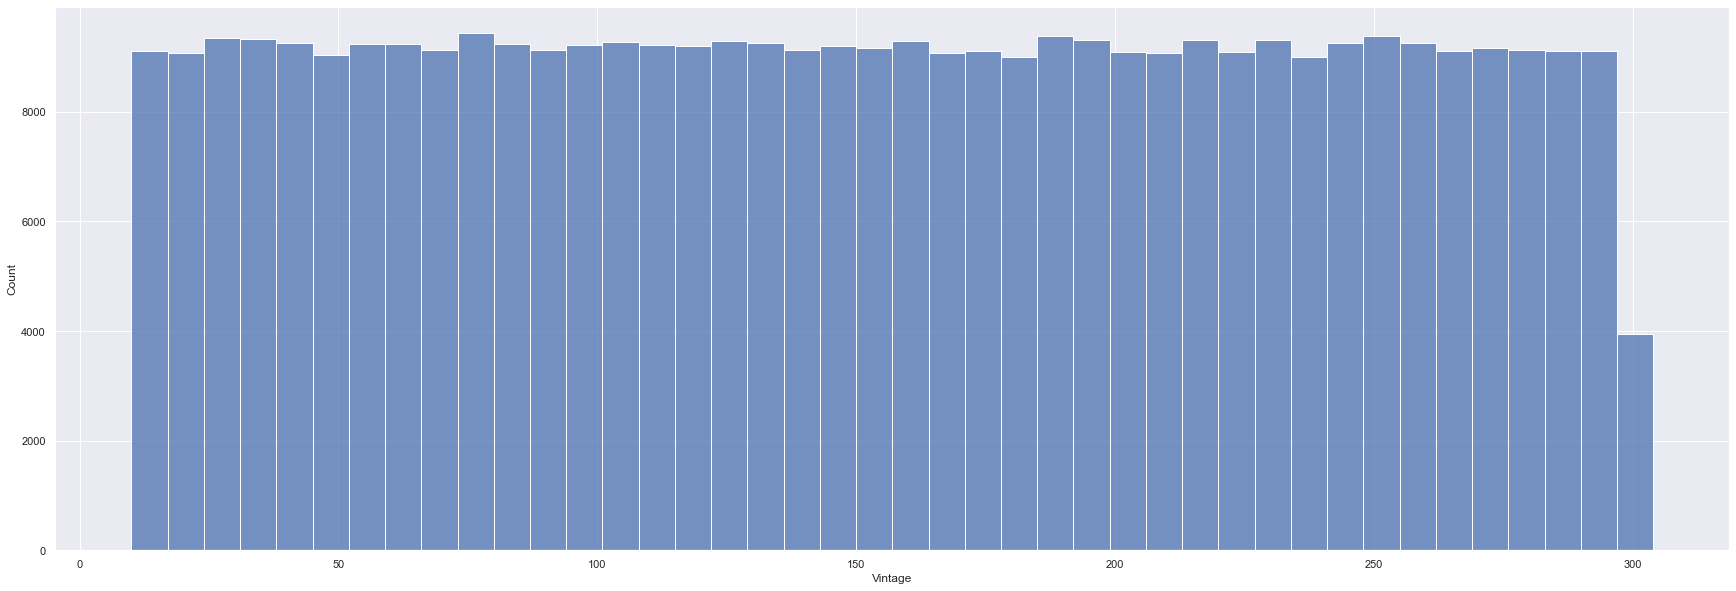

In [53]:
plot = sns.histplot(
    data=train,
    x="Vintage",
    binwidth=7 # 7 days = 1 week
)

<AxesSubplot:xlabel='Vintage', ylabel='Annual_Premium'>

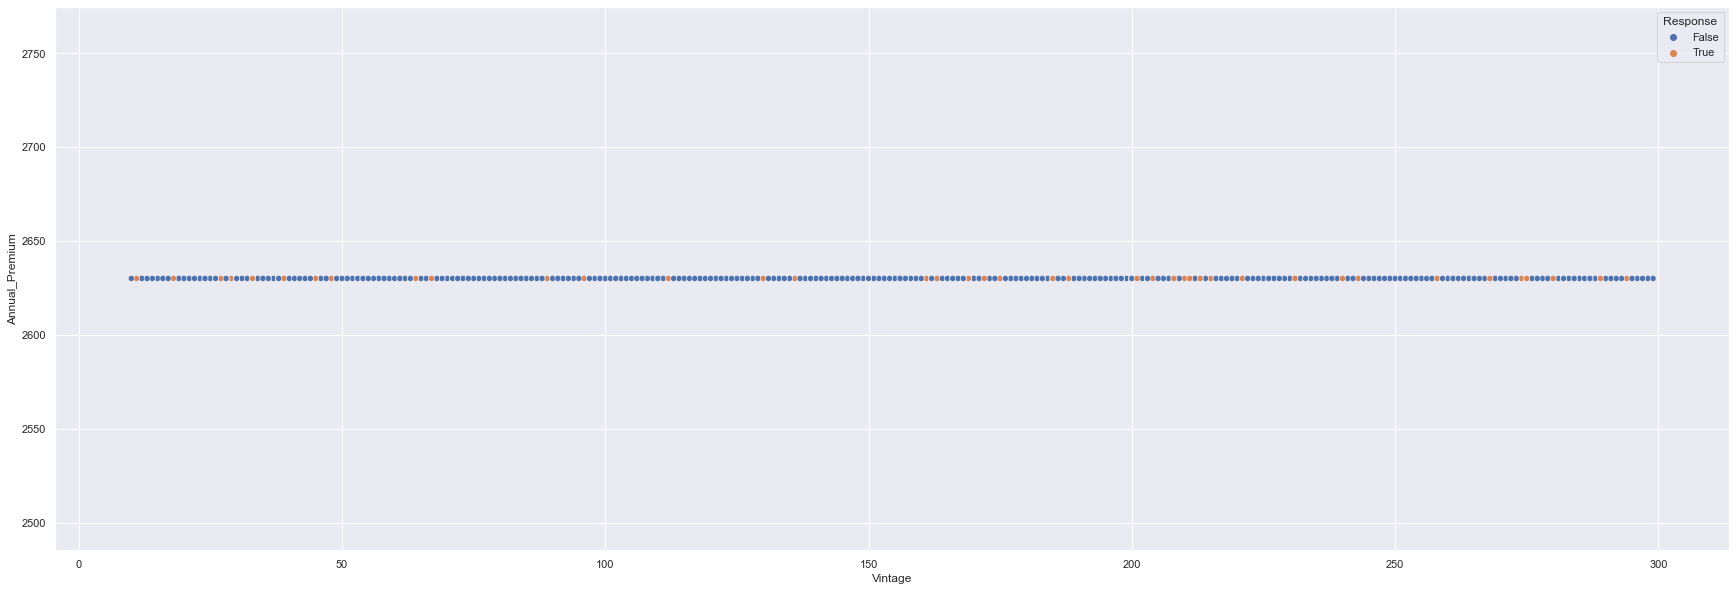

In [54]:

# Look at cheap contracts
d = train.loc[(train["Annual_Premium"] < 5000) & (train["Annual_Premium"] > 0)]
# d = d.loc[d["Response"] == True]
sns.scatterplot(data=d, x="Vintage", y="Annual_Premium", hue="Response")

Beobachtungen:
- Beinahe Gleichverteilung von `Vintage`
    - Es scheinen keine Verkaufsaktionen stattgefunden zu haben, oder sie sind ohne Erfolg geblieben
- Es gibt keine besonderen Zeiträume, in denen der günstige Pauschaltarif abgeschlossen wird
- Es gibt keine besonderen Zeiträume, in denen die  `Response` besonders gut ist

##### 2.8.11 Interpretation der Variable Response <a class="anchor" id="section_2_8_11"></a>

Die Variable `Response` beschreibt das Interesse der Kunden an einer KFZ-Versicherung. Es ist die Zielvariable, die mithilfe eines Modells vorhergesagt werdern soll.

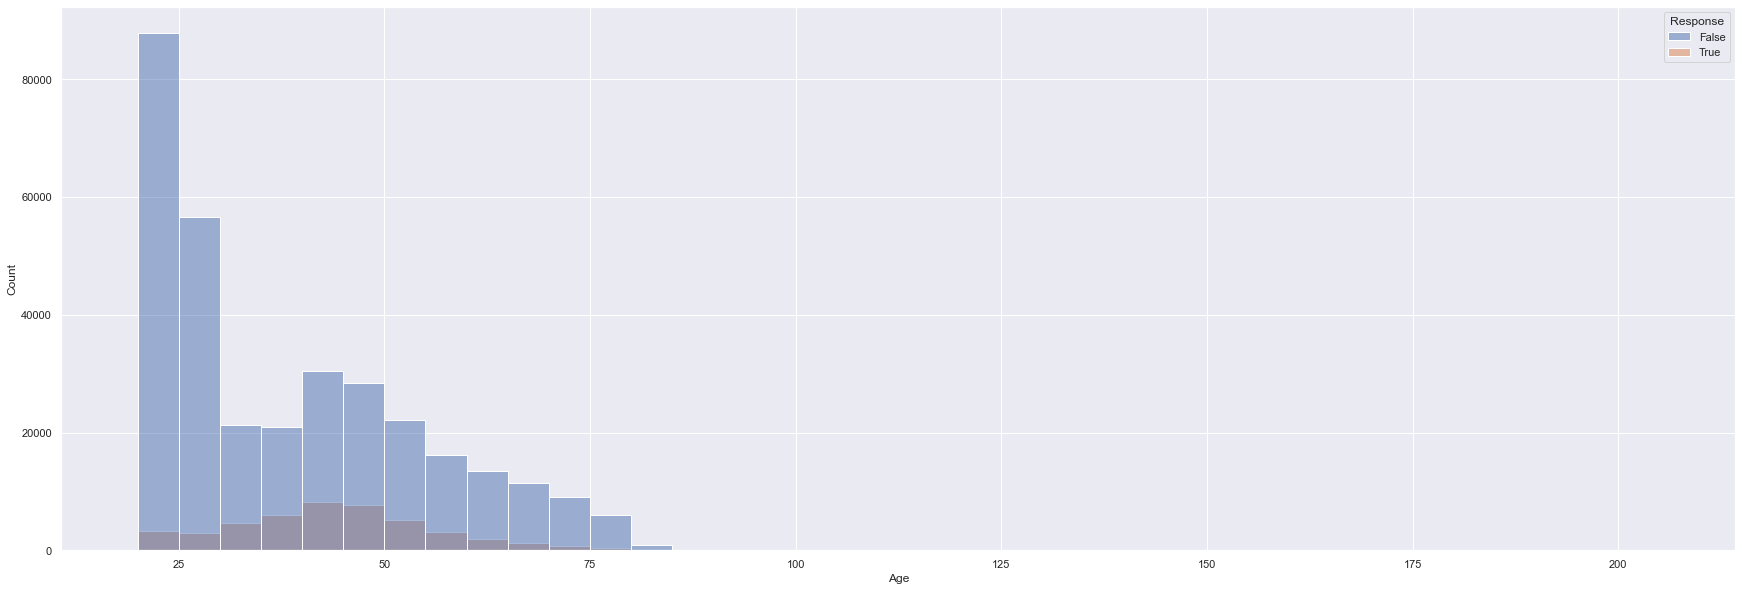

In [55]:
plot = sns.histplot(
    data=train,
    x="Age",
    binwidth=5,
    hue="Response"
)

Beobachtung:
- Kunden im mittleren Alter (zwischen 30 und 60) haben ein vergleichsweise höheres Interesse an einer Versicherung
- Ältere und jüngere Kunden haben ein überproportional geringes Interesse

Text(0.5, 1.0, 'Age >= 60')

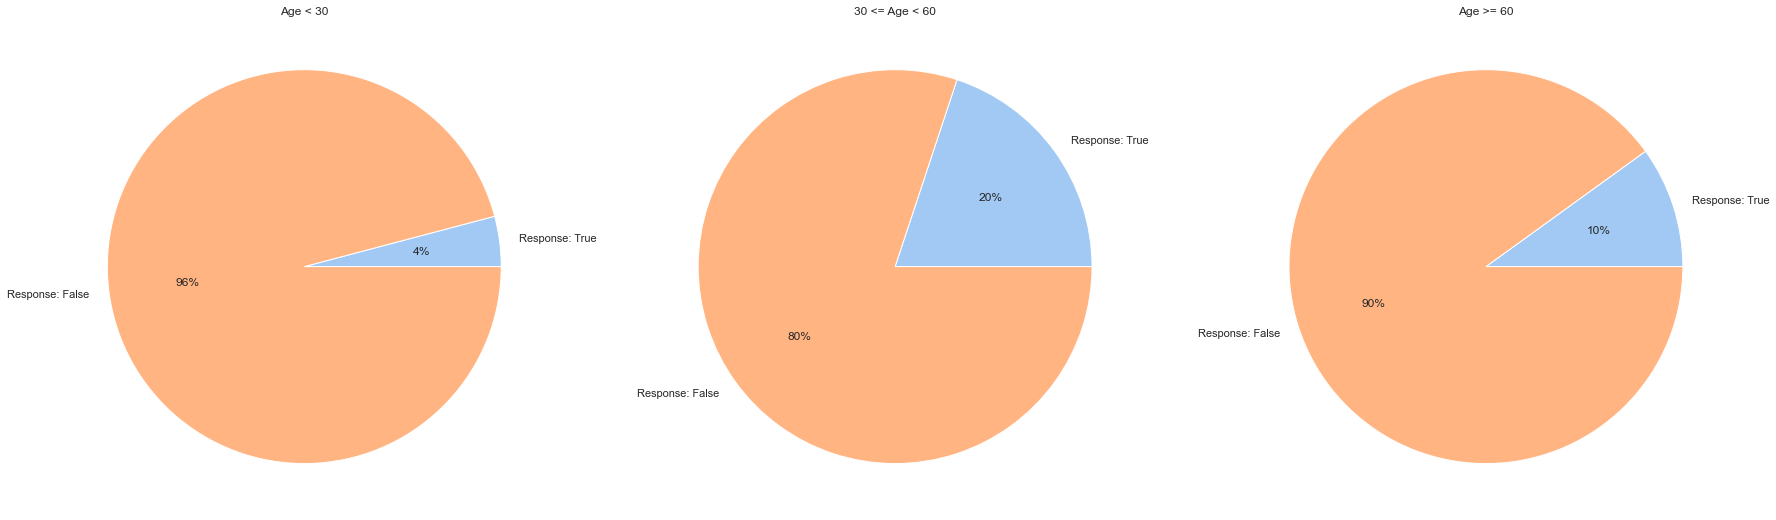

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
colors = sns.color_palette('pastel')[0:2]

d_1 = train.loc[train["Age"] < 30]
d_2 = train.loc[(train["Age"] >= 30) & (train["Age"] < 60)]
d_3 = train.loc[(train["Age"] >= 60) & (train["Age"] < 100)] # remove false data

l = ["Response: True", "Response: False"]

p_1 = [len(d_1.loc[d_1["Response"] == True]),
       len(d_1.loc[d_1["Response"] == False])]
ax1.pie(p_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Age < 30")

p_2 = [len(d_2.loc[d_2["Response"] == True]),
       len(d_2.loc[d_2["Response"] == False])]
ax2.pie(p_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("30 <= Age < 60")

p_3 = [len(d_3.loc[d_3["Response"] == True]),
       len(d_3.loc[d_3["Response"] == False])]
ax3.pie(p_3, labels=l, colors=colors, autopct='%.0f%%')
ax3.set_title("Age >= 60")

Beobachtung:
- Besonders in der Altersgruppe 30-60 ist ein besonders großes Interesse an einer KFZ-Versicherung zu erkennen

### 3. Data Preparation <a class="anchor" id="chapter3"></a>

Die Erkenntnisse, die im Kapitel **Data Understanding** gewonnen wurden, werden nachfolgend angewandt, um invalide Daten zu entfernen und die Datenqualität zu erhöhen

#### 3.1 Ausreißer behandeln <a class="anchor" id="section_3_1"></a>

##### 3.1.1 Ausreißer innerhalb der Variable Age <a class="anchor" id="section_3_1_1"></a>

- Ab dem Alter >=100 Jahre werden alle Werte in Missing Values umgewandelt, da dieses Alter nicht realistisch ist.
- Diese Grenze wurde als großzügige Einschätzung den zu erwartenden Lebensalters festgelegt.
- Von dieser Änderung sind 100 Datensätze betroffen.

In [57]:
# len(train.loc[train["Age"]> 100])
train.loc[train["Age"] > 100, "Age"] = np.NaN
train.loc[train["Age"] < 18, "Age"] = np.NaN


#### 3.1.2 Ausreißer innerhalb der Variable Annual_Premium <a class="anchor" id="section_3_1_2"></a>

In [58]:
train["Annual_Premium"].describe()


count    380999.000000
mean      30527.700690
std       17242.997675
min       -9997.000000
25%       24371.000000
50%       31656.000000
75%       39390.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

Negative Werte für `Annual_Premium` sind nicht valide. Es würde bedeuten, dass die Versicherungsgesellschaft den Kunden bezahlt.

In [59]:
# remove negative values
train.loc[train["Annual_Premium"] < 0, "Annual_Premium"] = np.NaN


#### 3.2 Analyse der nicht vorhandenen Werte <a class="anchor" id="section_3_2"></a>

#### 3.2.1 Löschen der 51 fehlerhaften Datensätze <a class="anchor" id="section_3_2_1"></a>

Wie im Abschnitt Data Unterstanding beschrieben wurden 51 Datensätze mit vielen fehlenden Werten gefunden. Da diese keinen signifikanten Einfluss auf das Modell haben werden, werden sie entfernt.

In [60]:
# remove faulty data sets
# bad_train was generated before and contains 51 data sets that we want to remove
train = train.loc[~train["id"].isin(bad_train["id"].to_numpy())]  # ~ = not
train.isna().sum()


id                          0
Gender                   1000
Age                     10941
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium            367
Policy_Sales_Channel        0
Vintage                     0
Response                    0
dtype: int64

#### 3.3 Imputation der fehlenden Werte <a class="anchor" id="section_3_3"></a>


##### 3.3.1 Imputation der Variable Age <a class="anchor" id="section_3_3_1_1"></a>

In [61]:
# MEAN
if age_imputer == "simple_mean":
    train_imputer_age_mean = SimpleImputer(
        strategy="mean", missing_values=np.nan)
    train_imputer_age_mean = train_imputer_age_mean.fit(train[["Age"]])
    train["Age"] = train_imputer_age_mean.transform(train[["Age"]])

# MEDIAN
if age_imputer == "simple_median":
    train_imputer_age_median = SimpleImputer(
        strategy="median", missing_values=np.nan)
    train_imputer_age_median = train_imputer_age_median.fit(train[["Age"]])
    train["Age"] = train_imputer_age_median.transform(train[["Age"]])

# HOT CODE LOCF
if age_imputer == "hot_code_locf":
    train["Age"].fillna(method="ffill", inplace=True)

train.isna().sum()


id                         0
Gender                  1000
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium           367
Policy_Sales_Channel       0
Vintage                    0
Response                   0
dtype: int64

##### 3.3.2 Imputation der Variable Annual_Premium <a class="anchor" id="section_3_3_1_2"></a>

In [62]:
# MEAN
if annual_premium_imputer == "simple_mean":
    train_imputer_age_mean = SimpleImputer(
        strategy="mean", missing_values=np.nan)
    train_imputer_age_mean = train_imputer_age_mean.fit(
        train[["Annual_Premium"]])
    train["Annual_Premium"] = train_imputer_age_mean.transform(
        train[["Annual_Premium"]])

# MEDIAN
if annual_premium_imputer == "simple_median":
    train_imputer_age_median = SimpleImputer(
        strategy="median", missing_values=np.nan)
    train_imputer_age_median = train_imputer_age_median.fit(
        train[["Annual_Premium"]])
    train["Annual_Premium"] = train_imputer_age_median.transform(
        train[["Annual_Premium"]])

# HOT CODE LOCF
if annual_premium_imputer == "hot_code_locf":
    train["Annual_Premium"].fillna(method="ffill", inplace=True)

train.isna().sum()


id                         0
Gender                  1000
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Vintage                    0
Response                   0
dtype: int64

##### 3.3.4 Ersetzung der fehlenden Werte kategorialer Variablen <a class="anchor" id="section_3_3_4"></a>

##### 3.3.4.1 Imputation der Variable Gender <a class="anchor" id="section_3_3_4_1"></a>

In [63]:
train_imputer_age_median = SimpleImputer(
    missing_values=np.nan, strategy="most_frequent")
train_imputer_age_median = train_imputer_age_median.fit(train[["Gender"]])
train["Gender"] = train_imputer_age_median.transform(train[["Gender"]])
train.isna().sum()


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### 3.4. Sampling <a class="anchor" id="section_3_4"></a>


- Betrachtung der Zielvariable `Response`.
- Insgesamter Datensatz der Zielvariable beträgt: 380948 Datensätze
- Davon True: 46695 Datensätze, das macht 12% des Datensatzes aus. Dies ist die minority class
- Davon False: 334253 Datensätze, das macht 88% des Datessatzes aus. Dies ist die majority class

Text(0.5, 1.0, 'Balkendiagramm der Zielvariable Response\n')

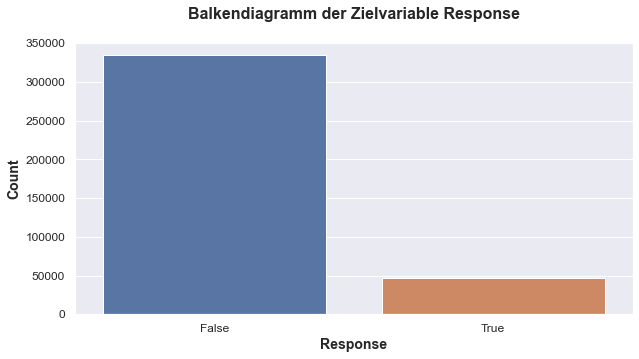

In [64]:
sns.set(rc={"figure.figsize":(10, 5)})

countplot = sns.countplot(data=train, x="Response")

countplot.set_xlabel("Response", fontsize = 14, weight="bold")
countplot.set_ylabel("Count", fontsize = 14, weight="bold")

plt.tick_params(axis="both", labelsize=12)
countplot.set_title("Balkendiagramm der Zielvariable Response" + "\n", fontsize = 16, weight="bold")

In [65]:
#minority_class
minority_class_len = len(train[train["Response"] == True])
print(f"Die Variable Response enthält {minority_class_len} Datensätze die den Wert True enthalten.")

#majority_class
majority_class_len = len(train[train["Response"] == False])
print(f"Die Variable Response enthält {majority_class_len} Datensätze die den Wert False enthalten.")

selected_values = train["Response"].value_counts(normalize=True)
print(selected_values)

Die Variable Response enthält 46695 Datensätze die den Wert True enthalten.
Die Variable Response enthält 334253 Datensätze die den Wert False enthalten.
False    0.877424
True     0.122576
Name: Response, dtype: float64


##### 3.4.1. Undersampling <a class="anchor" id="section_3_4_1"></a>

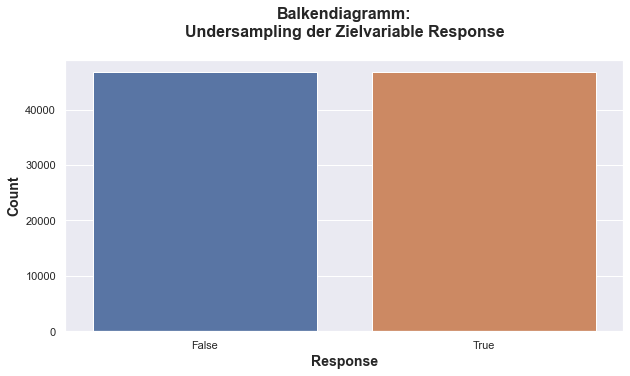

In [66]:
def undersampling_dataset(imbalanced_dataset):
    for element in imbalanced_dataset:
        #Variable "Response" values count as integer
        response_false_count, response_true_count = imbalanced_dataset["Response"].value_counts()
        
        #Seperate in bool values (True and False values)
        seperate_response_false = imbalanced_dataset[imbalanced_dataset["Response"] == False]
        seperate_response_true = imbalanced_dataset[imbalanced_dataset["Response"] == True]
        
        #Undersampling to balance imbalanced datasets --> deleting samples from the majority class
        response_false_undersampling = seperate_response_false.sample(response_true_count)
        global undersampling
        undersampling = pd.concat([response_false_undersampling, seperate_response_true], axis = 0)    

        #Plot after Undersampling
        sns.set(rc={"figure.figsize":(10, 5)}) 
        countplot =sns.countplot(x="Response", data=undersampling)
        countplot.set_title("Balkendiagramm:" + "\n" + "Undersampling der Zielvariable Response" + "\n", fontsize = 16, weight="bold")
        countplot.set_xlabel("Response", fontsize = 14, weight="bold")
        countplot.set_ylabel("Count", fontsize = 14, weight="bold")
        
        
undersampling_dataset(train)

- Datensätze aus der majority_class werden zufällig entfernt.
    - Daraus entsteht eine identische Anzahl an Datensätzen für die Zielvariable `Response` mit den Ausprägungen True und False.
    - Der Datensatz wird balanciert, indem die gleiche Anzahl an Datensätzen von True zufällig für False gezogen wird.

In [67]:
#minority_class
minority_class_len = len(undersampling[undersampling["Response"] == True])
print(f"Die Variable Response enthält {minority_class_len} Datensätze die den Wert True enthalten.")

#majority_class
majority_class_len = len(undersampling[undersampling["Response"] == False])
print(f"Die Variable Response enthält {majority_class_len} Datensätze die den Wert False enthalten.")

selected_values = undersampling["Response"].value_counts(normalize=True)
print(selected_values)


Die Variable Response enthält 46695 Datensätze die den Wert True enthalten.
Die Variable Response enthält 46695 Datensätze die den Wert False enthalten.
False    0.5
True     0.5
Name: Response, dtype: float64


##### 3.4.2. Oversampling <a class="anchor" id="section_3_4_2"></a>

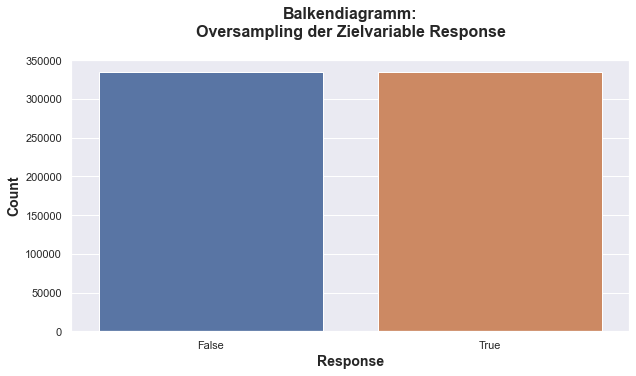

In [68]:
def oversampling_dataset(imbalanced_dataset):
    for element in imbalanced_dataset:
        #Variable "Response" values count as integer
        response_false_count, response_true_count = imbalanced_dataset["Response"].value_counts()
        
        #Seperate in bool values (True and False values)
        seperate_response_false = imbalanced_dataset[imbalanced_dataset["Response"] == False]
        seperate_response_true = imbalanced_dataset[imbalanced_dataset["Response"] == True]
        
        #Undersampling to balance imbalanced datasets --> deleting samples from the majority class
        response_true_oversampling = seperate_response_true.sample(response_false_count, replace=True)
        global oversampling
        oversampling = pd.concat([response_true_oversampling, seperate_response_false], axis = 0)    

        #Plot after Oversampling
        sns.set(rc={"figure.figsize":(10, 5)}) 
        countplot =sns.countplot(x="Response", data=oversampling)
        countplot.set_title("Balkendiagramm:" + "\n" + "Oversampling der Zielvariable Response" + "\n", fontsize = 16, weight="bold")
        countplot.set_xlabel("Response", fontsize = 14, weight="bold")
        countplot.set_ylabel("Count", fontsize = 14, weight="bold")
        
        
oversampling_dataset(train)

- Datensätze aus der minority_class werden durch Generierung künstlicher Beispiele aufgestockt.
    - Daraus entsteht eine identische Anzahl an Datensätzen für die Zielvariable `Response` mit den Ausprägungen True und False.
    - Der Datensatz wird balanciert, indem die gleiche Anzahl an Datensätzen von False künstlich für True erzeugt wird.

In [69]:
#minority_class
minority_class_len = len(oversampling[oversampling["Response"] == True])
print(f"Die Variable Response enthält {minority_class_len} Datensätze die den Wert True enthalten.")

#majority_class
majority_class_len = len(oversampling[oversampling["Response"] == False])
print(f"Die Variable Response enthält {majority_class_len} Datensätze die den Wert False enthalten.")

selected_values = oversampling["Response"].value_counts(normalize=True)
print(selected_values)

Die Variable Response enthält 334253 Datensätze die den Wert True enthalten.
Die Variable Response enthält 334253 Datensätze die den Wert False enthalten.
True     0.5
False    0.5
Name: Response, dtype: float64


#### 3.5. Feature Engineering <a class="anchor" id="section_3_5"></a>


##### 3.5.1. Altersklassen als Feature <a class="anchor" id="section_3_5_1"></a>

- Eingrenzung der Variable `Age` in 8 Quantile (q=8) um die Intervalle festzustellen.
- Das Ergebnis der Funktion ".qcut" ist eine Variable des Datentypes "Category" da jedes Intervall (bin) einer Kategorie entspricht.
- Die Kategorien sind in einer mathematischen Notation beschrieben.
    - (exklusive, inklusive]
- Der Kategorien der Variable `Age_bin` sind:
    - (19.999,23] < (23,25] < (25,28] < (28,37] < (37,43] < (43,49] < (49,59] < (59,85]

In [70]:
train['Age_bins'] = pd.qcut(train.Age, q=8)
train['Age_bins'].value_counts().sort_index()


(19.999, 23.0]    65902
(23.0, 25.0]      45269
(25.0, 28.0]      32300
(28.0, 37.0]      48040
(37.0, 43.0]      53249
(43.0, 49.0]      44191
(49.0, 59.0]      46610
(59.0, 85.0]      45387
Name: Age_bins, dtype: int64

<Figure size 1584x720 with 0 Axes>

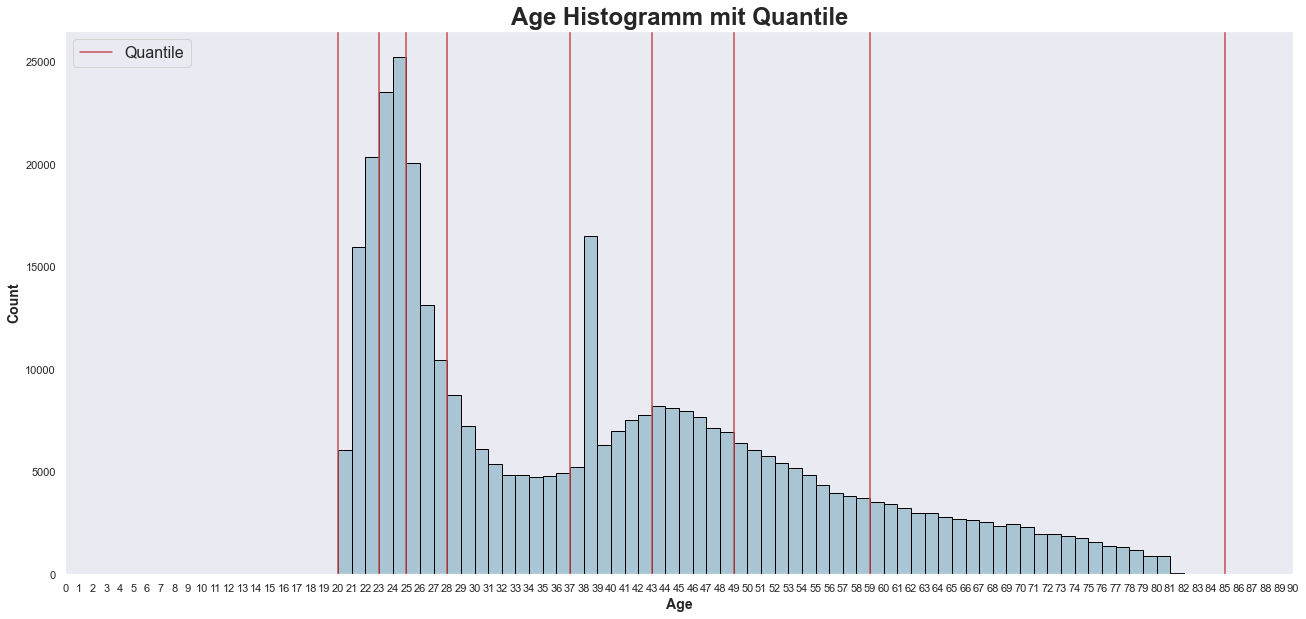

In [78]:
octiles_list = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]
octiles = train["Age"].quantile(octiles_list)

plt.figure(figsize= (22, 10))
fig, ax = plt.subplots()
train['Age'].hist(bins=65, color='#A9C5D3', 
                             edgecolor='black', grid=False)

for quantile in octiles:
    axvlineplot = plt.axvline(quantile, color='r')
ax.legend([axvlineplot], ['Quantile'], fontsize=16)

ax.set_title('Age Histogramm mit Quantile', 
             fontsize=24, weight="bold")
ax.set_xlabel('Age', fontsize=14, weight="bold")
ax.set_ylabel('Count', fontsize=14, weight="bold")
ax.set_xlim(0, 90)
ax.set_xticks(range(0, 91, 1))


- Zur besseren Leserlichkeit wurden die Kategorien mit dem Parameter "labels" händisch eingeteilt, dabei ist darauf zu achten welche Werte exklusiv und inklusiv sind.

In [72]:
def numerical_binning(data):
        data['Age_bins'] = pd.qcut(
            data.Age, q=8, labels=[
                ("20-23"),("24-25"),("26-28"),("29-37"),("38-43"),("44-49"),("50-59"),("60-85")
                ]
            )
        return data['Age_bins'].value_counts().sort_index()

numerical_binning(train)


20-23    65902
24-25    45269
26-28    32300
29-37    48040
38-43    53249
44-49    44191
50-59    46610
60-85    45387
Name: Age_bins, dtype: int64

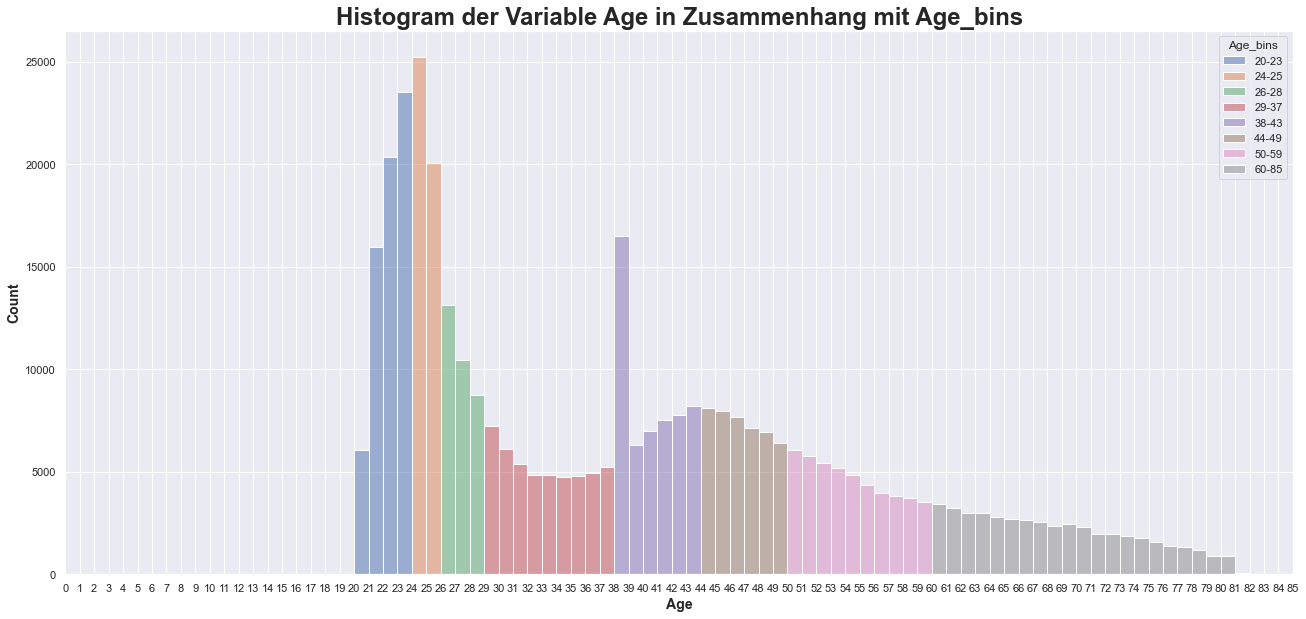

In [73]:
sns.set(rc={"figure.figsize": (22, 10)})
histplot =sns.histplot(train, x="Age", hue="Age_bins", bins=65)

histplot.set_title('Histogram der Variable Age in Zusammenhang mit Age_bins', 
             fontsize=24, weight="bold")
histplot.set_xlabel('Age', fontsize=14, weight="bold")
histplot.set_ylabel('Count', fontsize=14, weight="bold")
histplot.set_xlim(0, 85)
histplot.set_xticks(range(0, 86, 1))

##### 3.5.2. Features durch Aggregationen, Differenzen und Verhältnisse <a class="anchor" id="section_3_5_2"></a>

In [74]:
def mean_encoding(data):
        selected_columns = data.select_dtypes(include = ["category"])
        for columns in selected_columns:
            
        #mean encoding using Annual_Premium as the numeric variable// 
        #group by categorical variables and obtain the mean over the numeric variable
            mean = data.groupby(columns)['Annual_Premium'].agg(['mean'])
            mean.columns = ['mean_Annual_Premium_by_' + columns]

        #joining the column mean_Annual_Premium_by_ to the main dataset (train)
            global train
            train = pd.merge(train, mean, left_on = columns, right_index=True, how = 'left')

        #mean encoding using Age as the numeric variable// 
            mean = data.groupby(columns)['Age'].agg(['mean'])
            mean.columns = ['mean_Age_by_' + columns]
            train = pd.merge(train, mean, left_on = columns, right_index=True, how = 'left')

        #mean encoding using Vintage as the numeric variable// 
            mean = data.groupby(columns)['Vintage'].agg(['mean'])
            mean.columns = ['mean_Vintage_by_' + columns]
            train = pd.merge(train, mean, left_on = columns, right_index=True, how = 'left')

mean_encoding(train)

In [75]:
train.dtypes

id                                                int64
Gender                                           object
Age                                             float64
Driving_License                                 boolean
Region_Code                                    category
Previously_Insured                              boolean
Vehicle_Age                                    category
Vehicle_Damage                                  boolean
Annual_Premium                                  float64
Policy_Sales_Channel                           category
Vintage                                           Int64
Response                                           bool
Age_bins                                       category
mean_Annual_Premium_by_Region_Code              float64
mean_Age_by_Region_Code                         float64
mean_Vintage_by_Region_Code                     Float64
mean_Annual_Premium_by_Vehicle_Age              float64
mean_Age_by_Vehicle_Age                         

##### 3.5.3. weitere Features <a class="anchor" id="section_3_5_3"></a>